# Few Gotchas with pandas 

Doing Data Analysis with pandas is pretty straightforward until it is NOT! In this blog post, I present a few gotchas with pandas that you don't need to repeat.

To run the examples download this Jupyter notebook.

To Step Up Your Pandas Game, read:
- [5 lesser-known pandas tricks](https://towardsdatascience.com/5-lesser-known-pandas-tricks-e8ab1dd21431),
- [Exploratory Data Analysis with pandas](https://towardsdatascience.com/exploratory-data-analysis-with-pandas-508a5e8a5964),
- [How NOT to write pandas code](https://towardsdatascience.com/how-not-to-write-pandas-code-ef88599c6e8f).

In [22]:
%matplotlib inline

In [23]:
import glob
from platform import python_version

import pandas as pd
import matplotlib as mpl

In [24]:
mpl.pyplot.rcParams['figure.facecolor'] = 'w'

In [25]:
print("python version==%s" % python_version())
print("pandas==%s" % pd.__version__)
print("matplotlib==%s" % mpl.__version__)

python version==3.7.3
pandas==0.25.3
matplotlib==3.1.2


In [26]:
filepaths = glob.glob('data/*.gz')
filepaths

['data/20191210.csv.gz', 'data/20191209.csv.gz', 'data/20191211.csv.gz']

In [27]:
filepaths = sorted(filepaths)
filepaths

['data/20191209.csv.gz', 'data/20191210.csv.gz', 'data/20191211.csv.gz']

In [28]:
sorted(['100', '200', '1000', '20000', '9'])

['100', '1000', '200', '20000', '9']

In [29]:
sorted([100, 200, 1000, 20000, 9])

[9, 100, 200, 1000, 20000]

In [30]:
df_list = []
for filepath in filepaths:
    df_ = pd.read_csv(filepath)
    df_list.append(df_)

df = pd.concat(df_list)
df.shape

(1578327, 10)

In [31]:
df.head()

,timestamp,symbol,side,size,price,tickDirection,trdMatchID,grossValue,homeNotional,foreignNotional
0,2019-12-09D00:00:18.265072000,ADAZ19,Buy,5319,0.000005,ZeroPlusTick,7317fb7d-1bec-af18-e030-d8d6d9c684ac,2749923,5319.0,0.027499
1,2019-12-09D00:00:42.503391000,ADAZ19,Sell,10000,0.000005,MinusTick,43a3c08b-2c86-20a4-9722-f59f0a3e12c8,5160000,10000.0,0.051600
2,2019-12-09D00:01:50.513620000,ADAZ19,Buy,20000,0.000005,PlusTick,643f6fea-a72e-f3ac-994f-e923a0c2212c,10340000,20000.0,0.103400
3,2019-12-09D00:02:35.189775000,ADAZ19,Buy,18543,0.000005,ZeroPlusTick,153fe5ef-b974-606e-2321-b3ccff0caee3,9586731,18543.0,0.095867
4,2019-12-09D00:03:49.934950000,ADAZ19,Buy,1138,0.000005,ZeroPlusTick,dfc5efdd-76fa-9ef7-38bf-ffec4a564530,588346,1138.0,0.005883


In [32]:
df.timestamp

0         2019-12-09D00:00:18.265072000
1         2019-12-09D00:00:42.503391000
2         2019-12-09D00:01:50.513620000
3         2019-12-09D00:02:35.189775000
4         2019-12-09D00:03:49.934950000
                      ...              
389905    2019-12-11D23:35:26.637330000
389906    2019-12-11D23:35:26.637330000
389907    2019-12-11D23:37:25.166632000
389908    2019-12-11D23:40:09.701271000
389909    2019-12-11D23:55:46.793512000
Name: timestamp, Length: 1578327, dtype: object

In [33]:
pd.Series(['100', '200', '1000', '20000', '9']).sort_values()

0      100
2     1000
1      200
3    20000
4        9
dtype: object

In [34]:
df.timestamp = pd.to_datetime(df.timestamp.str.replace("D", "T"))
df.timestamp

0        2019-12-09 00:00:18.265072
1        2019-12-09 00:00:42.503391
2        2019-12-09 00:01:50.513620
3        2019-12-09 00:02:35.189775
4        2019-12-09 00:03:49.934950
                    ...            
389905   2019-12-11 23:35:26.637330
389906   2019-12-11 23:35:26.637330
389907   2019-12-11 23:37:25.166632
389908   2019-12-11 23:40:09.701271
389909   2019-12-11 23:55:46.793512
Name: timestamp, Length: 1578327, dtype: datetime64[ns]

In [37]:
df = df[df.symbol == 'XBTUSD']
df.shape

(1309671, 10)

In [40]:
df = df.sort_values("timestamp")

In [41]:
df.reset_index(inplace=True, drop=True)
df.head()

,timestamp,symbol,side,size,price,tickDirection,trdMatchID,grossValue,homeNotional,foreignNotional
0,2019-12-09 00:00:03.137637,XBTUSD,Buy,500,7512.5,ZeroPlusTick,084e9218-9596-3457-fee1-3012bb3ce1a6,6655500,0.066555,500.0
1,2019-12-09 00:00:03.157349,XBTUSD,Buy,14,7512.5,ZeroPlusTick,d25b3551-5850-0974-b844-80d591dff4d2,186354,0.001864,14.0
2,2019-12-09 00:00:03.165542,XBTUSD,Sell,5,7512.0,MinusTick,bad21a77-12eb-aed6-809b-8d3090d8efb2,66560,0.000666,5.0
3,2019-12-09 00:00:03.174043,XBTUSD,Sell,383,7512.0,ZeroMinusTick,57da5cfd-a646-d014-d8b3-3c18e7565abc,5098496,0.050985,383.0
4,2019-12-09 00:00:03.178405,XBTUSD,Sell,20,7512.0,ZeroMinusTick,d95cdd09-7784-21e4-b008-192762fbf199,266240,0.002662,20.0


In [24]:
df.describe()

,size,price,grossValue,homeNotional,foreignNotional
count,1.309671e+06,1.309671e+06,1.309671e+06,1.309671e+06,1.309671e+06
mean,3.857544e+03,7.336222e+03,5.254340e+07,5.254340e-01,3.857544e+03
std,1.679764e+04,1.224793e+02,2.284365e+08,2.284365e+00,1.679764e+04
min,1.000000e+00,7.122000e+03,1.300600e+04,1.300600e-04,1.000000e+00
25%,3.200000e+01,7.223000e+03,4.367360e+05,4.367360e-03,3.200000e+01
50%,2.000000e+02,7.326500e+03,2.732200e+06,2.732200e-02,2.000000e+02
75%,1.627000e+03,7.460500e+03,2.222291e+07,2.222291e-01,1.627000e+03
max,2.486453e+06,7.689000e+03,3.328615e+10,3.328615e+02,2.486453e+06


In [25]:
df.columns

Index(['timestamp', 'symbol', 'side', 'size', 'price', 'tickDirection',
       'trdMatchID', 'grossValue', 'homeNotional', 'foreignNotional'],
      dtype='object')

In [42]:
df.describe(include='all')

,timestamp,symbol,side,size,price,tickDirection,trdMatchID,grossValue,homeNotional,foreignNotional
count,1309671,1309671,1309671,1.309671e+06,1.309671e+06,1309671,1309671,1.309671e+06,1.309671e+06,1.309671e+06
unique,407403,1,2,NaN,NaN,4,1309671,NaN,NaN,NaN
top,2019-12-09 07:04:18.260564,XBTUSD,Sell,NaN,NaN,ZeroMinusTick,34370c9e-38b5-fdcd-a900-ec25969cffc1,NaN,NaN,NaN
freq,1421,1309671,679823,NaN,NaN,603821,1,NaN,NaN,NaN
first,2019-12-09 00:00:03.137637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-12-11 23:59:59.861272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.857544e+03,7.336222e+03,NaN,NaN,5.254340e+07,5.254340e-01,3.857544e+03
std,NaN,NaN,NaN,1.679764e+04,1.224793e+02,NaN,NaN,2.284365e+08,2.284365e+00,1.679764e+04
min,NaN,NaN,NaN,1.000000e+00,7.122000e+03,NaN,NaN,1.300600e+04,1.300600e-04,1.000000e+00
25%,NaN,NaN,NaN,3.200000e+01,7.223000e+03,NaN,NaN,4.367360e+05,4.367360e-03,3.200000e+01


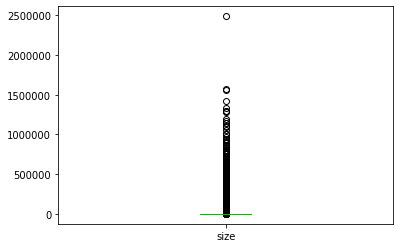

In [28]:
df["size"].plot(kind="box")

In [45]:
df['size_clip'] = df['size'].clip(df['size'].quantile(0.01), df['size'].quantile(0.99))

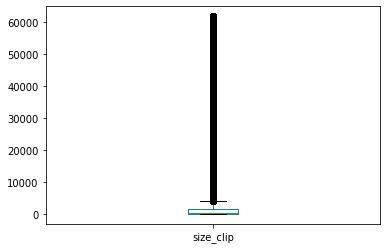

In [46]:
df.size_clip.plot(kind='box')

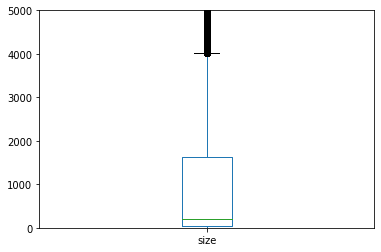

In [47]:
df["size"].plot(kind="box", ylim=(0, 5000))

In [48]:
df['price_discrete_bins'] = pd.cut(df.price, 5)
df['price_discrete_bins']

0            (7462.2, 7575.6]
1            (7462.2, 7575.6]
2            (7462.2, 7575.6]
3            (7462.2, 7575.6]
4            (7462.2, 7575.6]
                  ...        
1309666    (7121.433, 7235.4]
1309667    (7121.433, 7235.4]
1309668    (7121.433, 7235.4]
1309669    (7121.433, 7235.4]
1309670    (7121.433, 7235.4]
Name: price_discrete_bins, Length: 1309671, dtype: category
Categories (5, interval[float64]): [(7121.433, 7235.4] < (7235.4, 7348.8] < (7348.8, 7462.2] < (7462.2, 7575.6] < (7575.6, 7689.0]]

In [50]:
df['price_discrete_bins'].value_counts()

(7121.433, 7235.4]    419820
(7235.4, 7348.8]      367043
(7462.2, 7575.6]      301654
(7348.8, 7462.2]      200231
(7575.6, 7689.0]       20923
Name: price_discrete_bins, dtype: int64

In [53]:
df['price_discrete_labels'] = pd.cut(df.price, 5, labels=['very low', 'low', 'mid', 'high', 'very high'])
df['price_discrete_labels']

0              high
1              high
2              high
3              high
4              high
             ...   
1309666    very low
1309667    very low
1309668    very low
1309669    very low
1309670    very low
Name: price_discrete_labels, Length: 1309671, dtype: category
Categories (5, object): [very low < low < mid < high < very high]

In [55]:
df.price_discrete_labels.value_counts(normalize=True)

very low     0.320554
low          0.280256
high         0.230328
mid          0.152886
very high    0.015976
Name: price_discrete_labels, dtype: float64

In [76]:
df['price_discrete_equal_bins'] = pd.qcut(df.price, 5)
df['price_discrete_equal_bins']

0            (7477.0, 7689.0]
1            (7477.0, 7689.0]
2            (7477.0, 7689.0]
3            (7477.0, 7689.0]
4            (7477.0, 7689.0]
                  ...        
1309666    (7121.999, 7212.5]
1309667    (7121.999, 7212.5]
1309668    (7121.999, 7212.5]
1309669    (7121.999, 7212.5]
1309670    (7121.999, 7212.5]
Name: price_discrete_equal_bins, Length: 1309671, dtype: category
Categories (5, interval[float64]): [(7121.999, 7212.5] < (7212.5, 7292.5] < (7292.5, 7348.5] < (7348.5, 7477.0] < (7477.0, 7689.0]]

In [77]:
df.price_discrete_equal_bins.value_counts()

(7121.999, 7212.5]    264009
(7292.5, 7348.5]      262610
(7348.5, 7477.0]      262396
(7477.0, 7689.0]      260412
(7212.5, 7292.5]      260244
Name: price_discrete_equal_bins, dtype: int64

In [59]:
None == None

True

In [62]:
pd.np.nan == pd.np.nan

False

In [72]:
pd.np.log(-1)

/Users/r.orac/envs/r/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


nan

In [74]:
pd.np.arccos(2)

/Users/r.orac/envs/r/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in arccos
  """Entry point for launching an IPython kernel.


nan

In [75]:
pd.np.log(-1) == pd.np.arccos(2)

/Users/r.orac/envs/r/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
/Users/r.orac/envs/r/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in arccos
  """Entry point for launching an IPython kernel.


False